Visión por Computadora I

Trabajo Práctico N° 1

- Parte 1 (imágenes en `/white_patch`  y `/coord_cromaticas`):
    1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
    2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
    3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

- Parte 2:
    1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
    2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
    Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
    3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

### Parte 1.1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# mostrar version de python
print("Version de python: ", sys.version)
# mostrar version de opencv
print("Version de opencv: ", cv2.__version__)

Version de python:  3.8.18 (default, Aug 25 2023, 13:20:30) 
[GCC 11.4.0]
Version de opencv:  4.9.0


In [3]:
# 1.1
# Crear una función que convierta un color RGB a coordenadas cromáticas
def rgb_a_cromaticas(r, g, b):
    r_normalizado = r / 255.0
    g_normalizado = g / 255.0
    b_normalizado = b / 255.0

    denominador = r_normalizado + g_normalizado + b_normalizado

    if denominador != 0:
        x = r_normalizado / denominador
        y = g_normalizado / denominador
    else:
        x, y = 0, 0

    return x, y


In [4]:
# Directorio con las imágenes
directorio_coord = "../data/coord_cromaticas"

# Verificar si la ruta es válida
if os.path.exists(directorio_coord):
    # Listar todos los archivos en el directorio
    archivos_coord = os.listdir(directorio_coord)

    # Filtrar solo los archivos (excluir subdirectorios)
    archivos_coord = [archivo for archivo in archivos_coord if os.path.isfile(os.path.join(directorio_coord, archivo))]
    archivos_coord.sort()
else:
    print(f"La ruta '{directorio_coord}' no es válida.")

print(archivos_coord)

['CoordCrom_1.png', 'CoordCrom_2.png', 'CoordCrom_3.png']


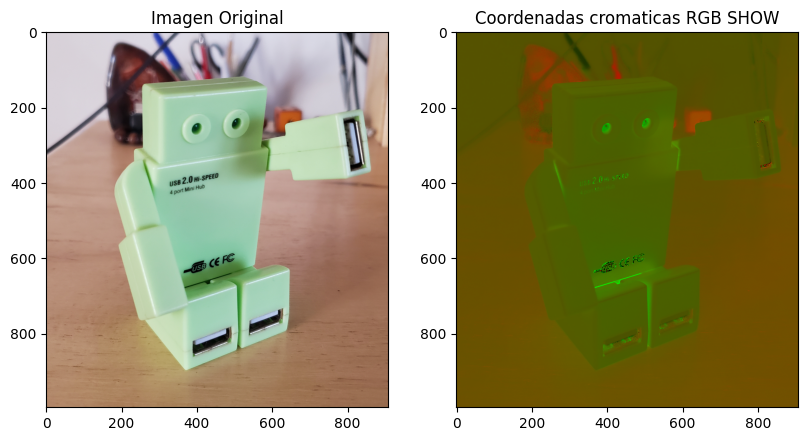

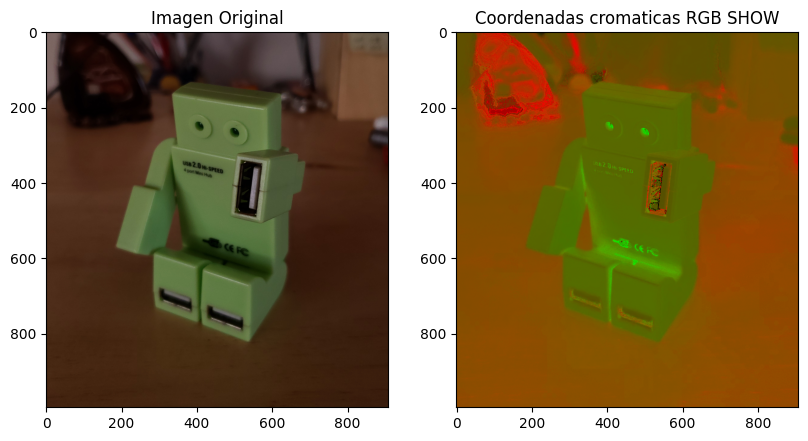

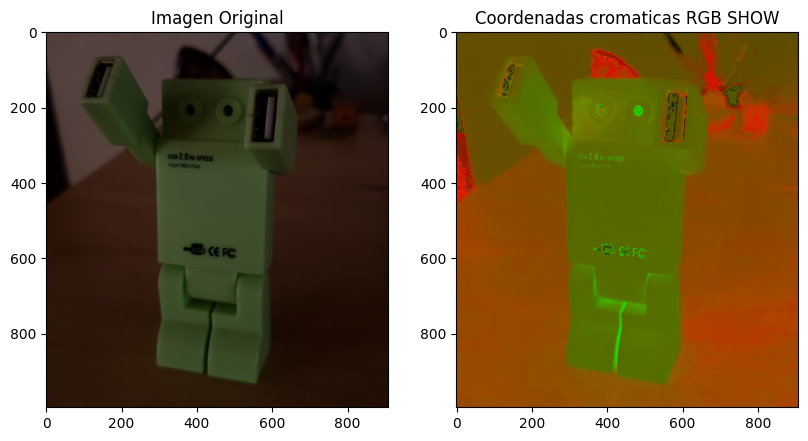

In [5]:
for archivo in archivos_coord:
    # Cargar la imagen original
    imagen = cv2.imread(os.path.join(directorio_coord, archivo))

    # Obtener las dimensiones de la imagen
    alto, ancho, _ = imagen.shape

    # Crear una matriz para almacenar las coordenadas cromáticas
    coordenadas_cromaticas = np.zeros((alto, ancho, 2), dtype=np.float32)

    # Aplicar la conversión a coordenadas cromáticas a cada píxel
    for i in range(alto):
        for j in range(ancho):
            b, g, r = imagen[i, j]
            x, y = rgb_a_cromaticas(r, g, b)
            coordenadas_cromaticas[i, j] = [x, y]

    # Crear una versión de coordenadas cromáticas con tres canales
    coordenadas_cromaticas_rgb = np.zeros((alto, ancho, 3), dtype=np.float32)
    coordenadas_cromaticas_rgb[:, :, 0:2] = coordenadas_cromaticas

    # Multiplicar las coordenadas cromáticas por 255
    coordenadas_cromaticas_rgb_show = (coordenadas_cromaticas_rgb * 255).astype(np.uint8)

    # Usar la función cv2.merge para combinar los canales correctamente
    coordenadas_cromaticas_bgr_show = cv2.merge(
        [
            coordenadas_cromaticas_rgb_show[:, :, 2],
            coordenadas_cromaticas_rgb_show[:, :, 1],
            coordenadas_cromaticas_rgb_show[:, :, 0],
        ]
    )

    # Ajustar la disposición de las subgráficas
    plt.figure(figsize=(15, 5))

    # Visualizar la imagen original y las coordenadas cromáticas
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")

    plt.subplot(1, 3, 2)
    plt.imshow(coordenadas_cromaticas_rgb_show)
    plt.title("Coordenadas cromaticas RGB SHOW")

    # plt.subplot(1, 3, 3)
    # plt.imshow(coordenadas_cromaticas_bgr_show)
    # plt.title("Coordenadas cromáticas BGR SHOW")

    plt.show()

    # Visualizar la imagen original y las coordenadas cromáticas
    # cv2.imshow("Imagen Original", imagen)
    # cv2.imshow("Coordenadas cromaticas", coordenadas_cromaticas_bgr_show)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

### Parte 1.2

In [6]:
# 1.2
# Algoritmo de balance de blancos
def white_patch(img):
    # Dividir cada canal por el valor máximo en ese canal
    max_values = np.max(img, axis=(0, 1))
    img_white_balanced = img / max_values

    # Asegurarse de que los valores estén en el rango [0, 1]
    img_white_balanced = np.clip(img_white_balanced, 0, 1)

    return img_white_balanced



In [7]:
# Directorio con las imágenes
directorio_white = "../data/white_patch/"

# Verificar si la ruta es válida
if os.path.exists(directorio_white):
    # Listar todos los archivos en el directorio
    archivos_white = os.listdir(directorio_white)

    # Filtrar solo los archivos (excluir subdirectorios)
    archivos_white = [archivo for archivo in archivos_white if os.path.isfile(os.path.join(directorio_white, archivo))]
    archivos_white.sort()
else:
    print(f"La ruta '{directorio_white}' no es válida.")

print(archivos_white)

['test_blue.png', 'test_green.png', 'test_red.png', 'wp_blue.jpg', 'wp_green.png', 'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']


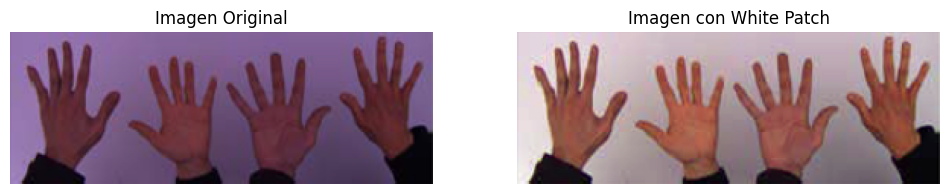

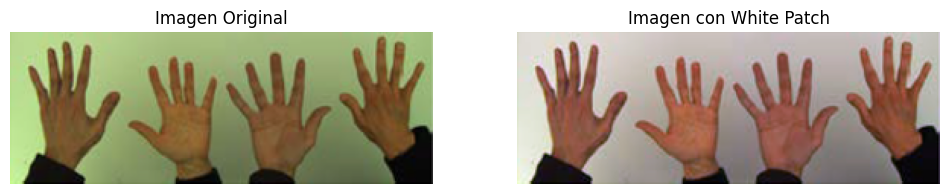

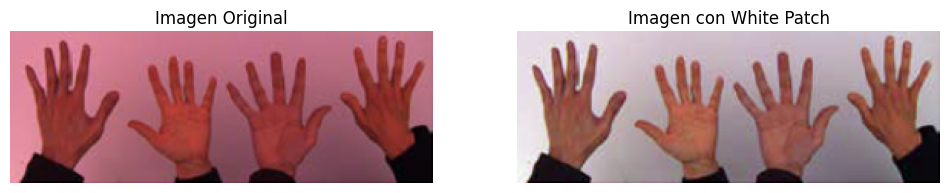

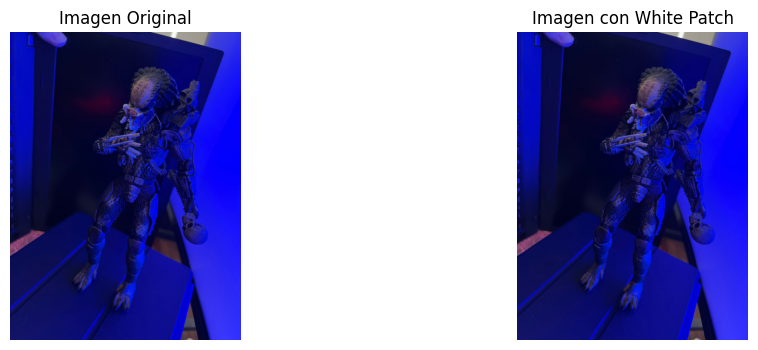

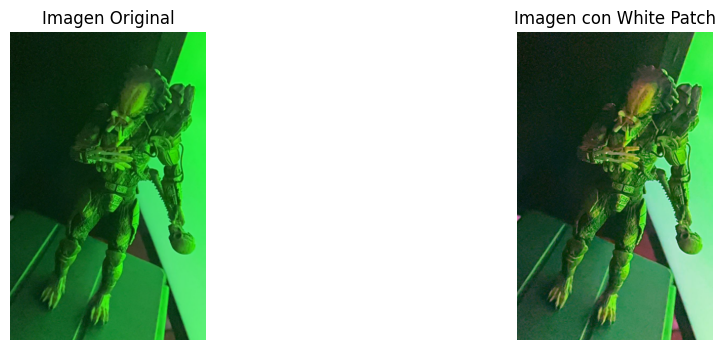

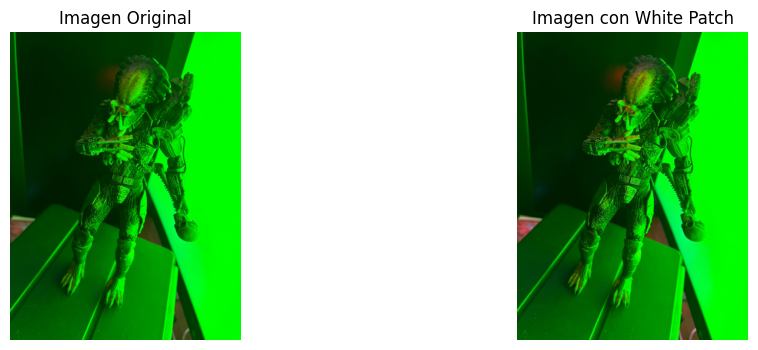

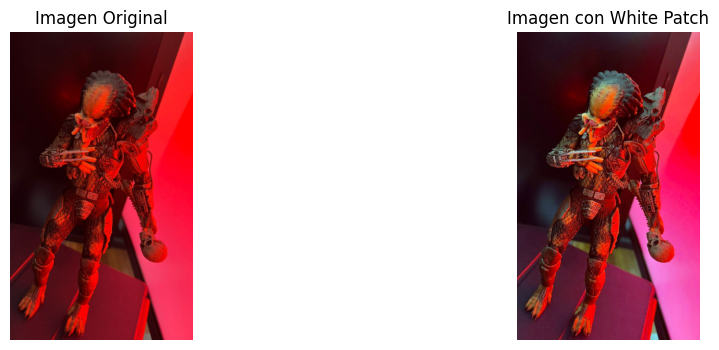

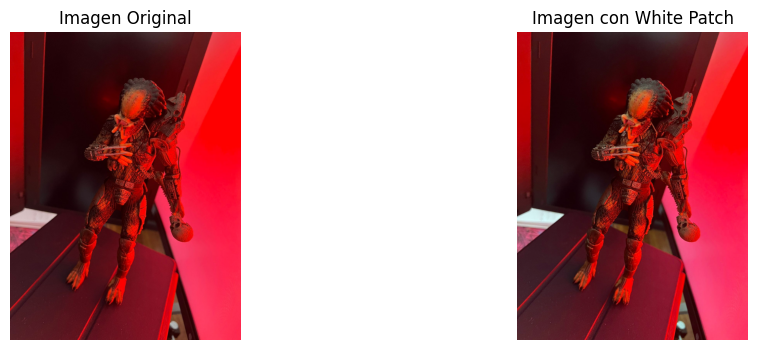

In [9]:

for archivo in archivos_white:
    # Cargar la imagen original
    imagen = cv2.imread(os.path.join(directorio_white, archivo))

    # Aplicar el algoritmo White Patch a la imagen
    imagen_white_balanced = white_patch(imagen)

    # Ajustar la disposición de las subgráficas
    plt.figure(figsize=(12, 4))

    # Visualizar la imagen original y la imagen con White Patch
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor((imagen_white_balanced * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title("Imagen con White Patch")
    plt.axis("off")

    plt.show()

